# G2M insight for Cab Investment firm 
## Week 2

### Business Problem:
XYZ is a private firm in US. XYZ wants to invest in US Cab Company. US has 2 major cab companies - Pink Cab and Yellow Cab. We have to find out which Cab company would be good choice to invest in for XYZ company. For this purpose,  we will mostly focus on profitable cab company. Whichever cab company seems suitable in terms on market value, we would invest in that.

### Importing Required Libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline

In [2]:
# importing Cab data
Cab_df = pd.read_csv("Cab_Data.csv")
Cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
Cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
# importing Customer data
Customer_df = pd.read_csv("Customer_ID.csv")
Customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# importing Transaction data
Transaction_df = pd.read_csv("Transaction_ID.csv")
Transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
Transaction_df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [8]:
Transaction_df['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [9]:
Transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [10]:
## merging Cab data and Transaction data
merge1 = pd.merge(Cab_df,Transaction_df,on="Transaction ID")
merge1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [11]:
## now merging the previous data with Customer data
merge2 = pd.merge(merge1,Customer_df,on="Customer ID")
merge2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [12]:
## importing City data
City_df = pd.read_csv('City.csv')
City_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
City_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
## converting Population Col into Int64 datatype
City_df['Population'] = City_df['Population'].apply(lambda x: x.replace(",",""))
City_df['Population'] = City_df['Population'].astype('int64')

In [15]:
## converting Users Col into Int64 datatype
City_df['Users'] = City_df['Users'].apply(lambda x: x.replace(",",""))
City_df['Users'] = City_df['Users'].astype('int64')

In [16]:
City_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [17]:
# dataframe after merging all the data
final_df = pd.merge(merge2,City_df,on="City")

In [18]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 41.1+ MB


In [20]:
## Coverting Date of Travel col into Datetime 

final_df["Date of Travel"] = final_df["Date of Travel"].apply(lambda x: date(1900, 1, 28) + timedelta(x))
final_df["Date of Travel"] = pd.to_datetime(final_df['Date of Travel'], errors='coerce')

In [22]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [23]:
## Checking for all null values
final_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [24]:
## checking for rows containing duplicates
final_df.duplicated().sum()

0

In [25]:
## Understanding Numerical data
final_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


# Visualizing the data for insights

In [26]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [27]:
## checking corealtion of each data col with each other
final_df.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


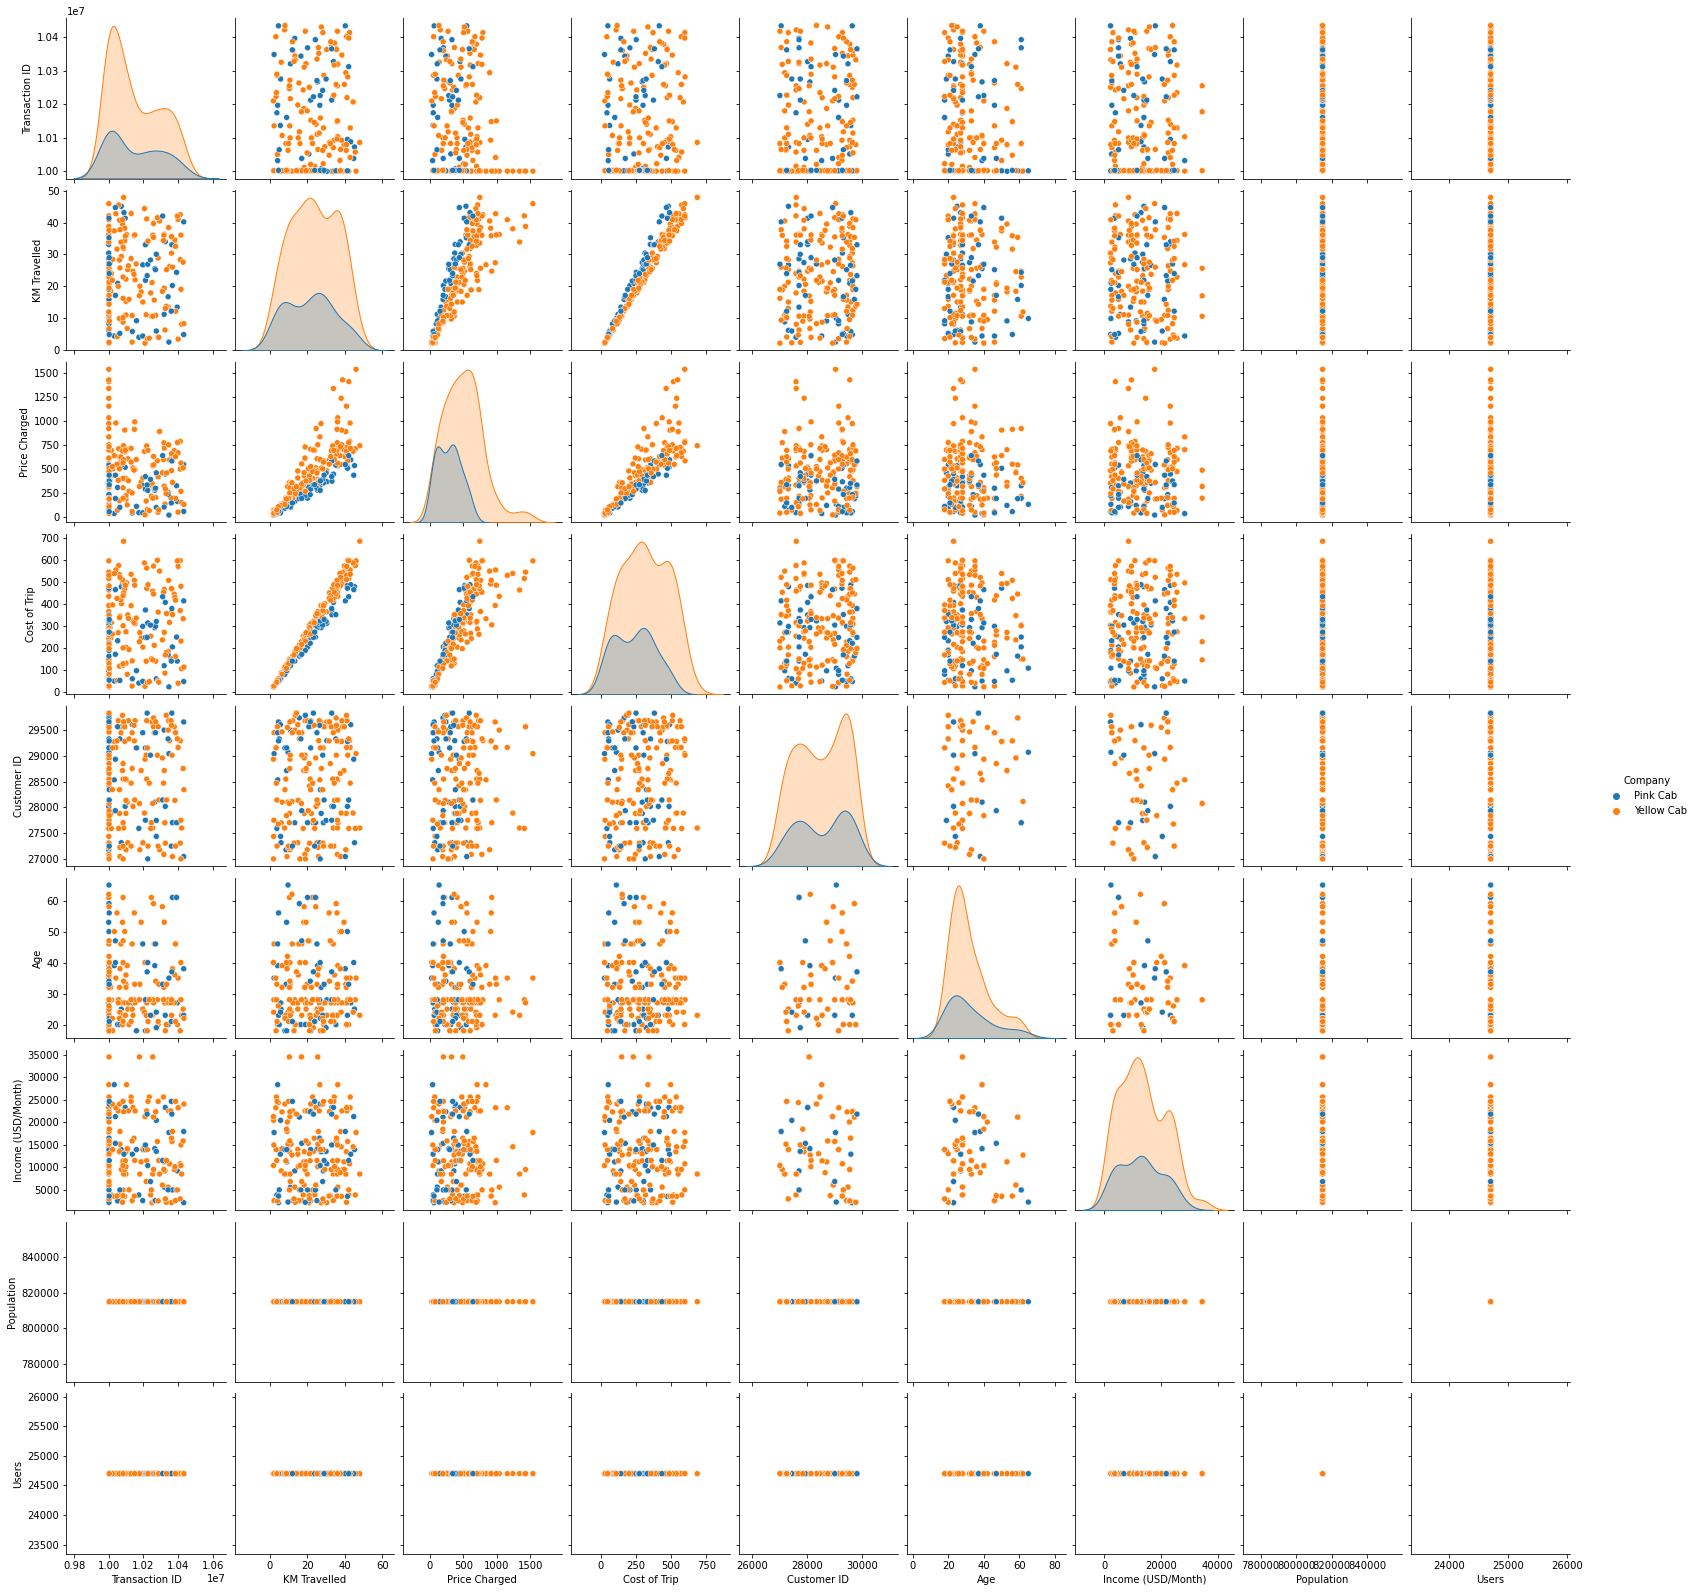

In [28]:
sns.pairplot(final_df.head(200),hue='Company')

# Performing Bivariate and Multivariate Analysis to find out meaning full insights

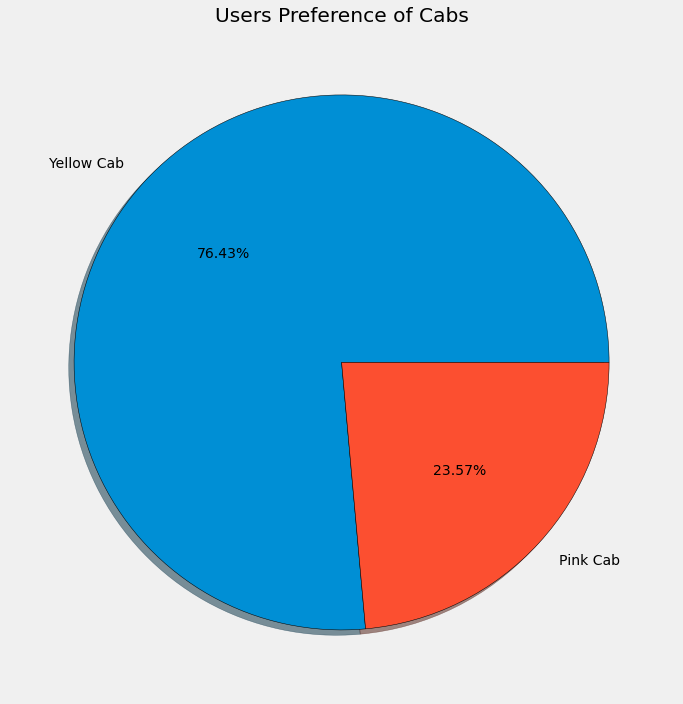

In [29]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,10))

slices = final_df['Company'].value_counts().values
labels = final_df['Company'].value_counts().index

plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},
        autopct='%1.2f%%',shadow=True)

plt.title("Users Preference of Cabs")
plt.tight_layout()
plt.show()

## Most Users prefer to use Yellow Cab Than Pink Cab

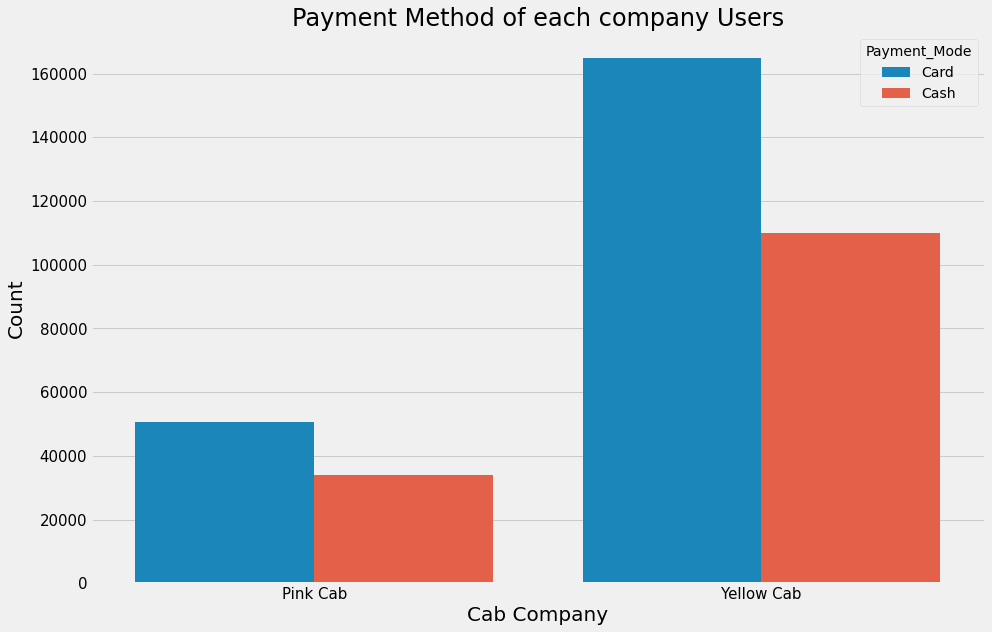

In [30]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,9))

sns.countplot(x='Company',hue='Payment_Mode',data=final_df)
plt.title('Payment Method of each company Users',fontsize=24)
plt.xlabel('Cab Company',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.tight_layout()
plt.show()

## Most users prefer to pay by Card than Cash

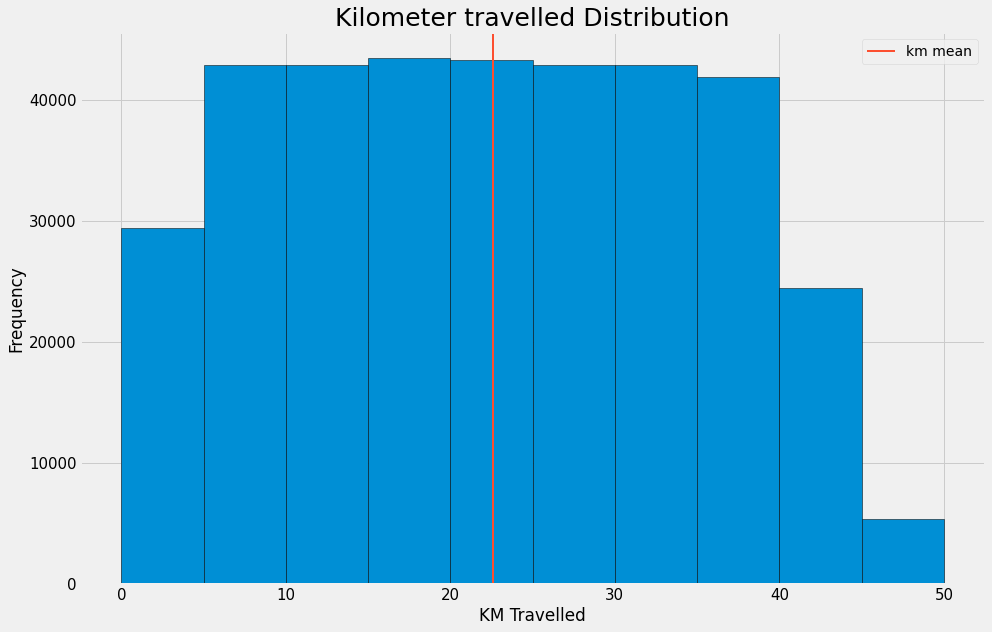

In [31]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,9))

km = final_df["KM Travelled"].values
bins = [0,5,10,15,20,25,30,35,40,45,50]

plt.hist(km,bins=bins,edgecolor='black')
mean_km = final_df["KM Travelled"].mean()

plt.axvline(mean_km,color='#fc4f30',label="km mean",linewidth=2)
plt.legend()

plt.title('Kilometer travelled Distribution',fontsize=25)
plt.xlabel('KM Travelled')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

##This graph shows that most of the users travel in between 5 to 40 km.

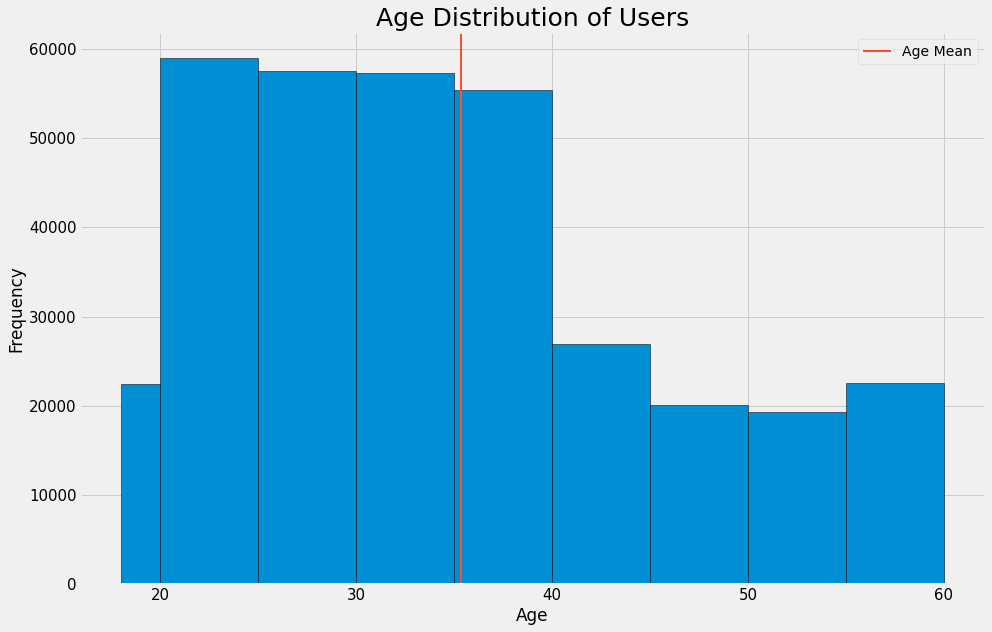

In [32]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,9))

age = final_df["Age"].values
bins = [18,20,25,30,35,40,45,50,55,60]

plt.hist(age,bins=bins,edgecolor='black')
mean_age = final_df["Age"].mean()

plt.axvline(mean_age,color='#fc4f30',label="Age Mean",linewidth=2)
plt.legend()

plt.title('Age Distribution of Users',fontsize=25)
plt.xlabel('Age')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


##This graph shows that most of the users where in between age 20 to 40.

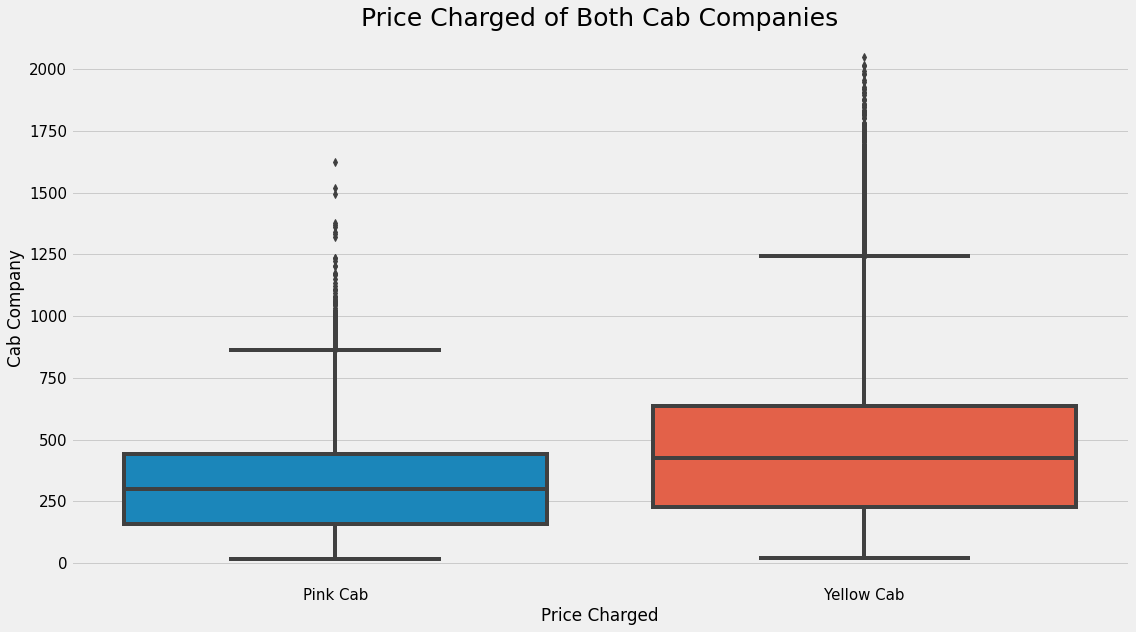

In [33]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='Company',y='Price Charged',data=final_df)
plt.title('Price Charged of Both Cab Companies', fontsize=25)
plt.xlabel('Price Charged')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cab Company')
plt.tight_layout()
plt.show()

## This graph shows that the price charged by Yellow cab is comparitively more than Pink Cab.

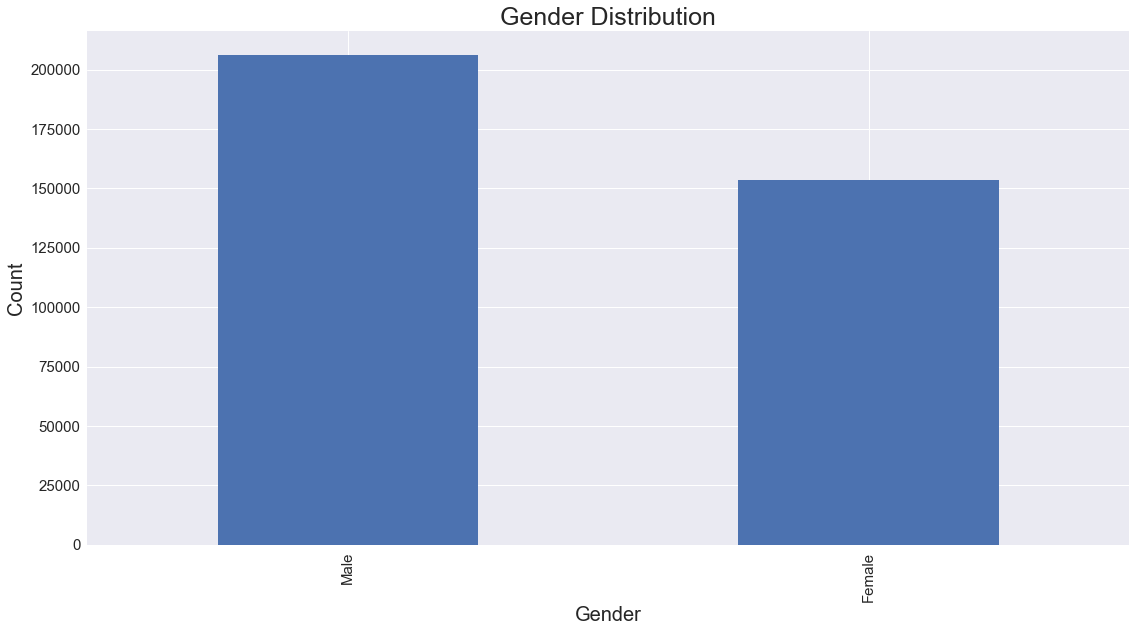

In [34]:
plt.style.use("seaborn")
plt.figure(figsize = (16, 9))
final_df.Gender.value_counts().plot.bar()
plt.title('Gender Distribution', fontsize=25)
plt.xlabel('Gender',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.tight_layout()
plt.show()

## This graph shows that the Male users prefer to travel by cab more.

In [35]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


Text(0, 0.5, 'Count')

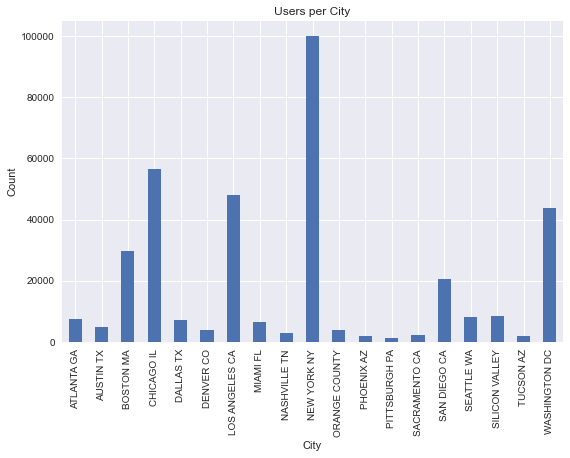

In [36]:
plt.style.use("seaborn")
final_df.groupby('City')['Users'].count().plot.bar()
plt.title('Users per City')
plt.ylabel("Count")

## This graph shows that New York City Has Most Number of Cab Users

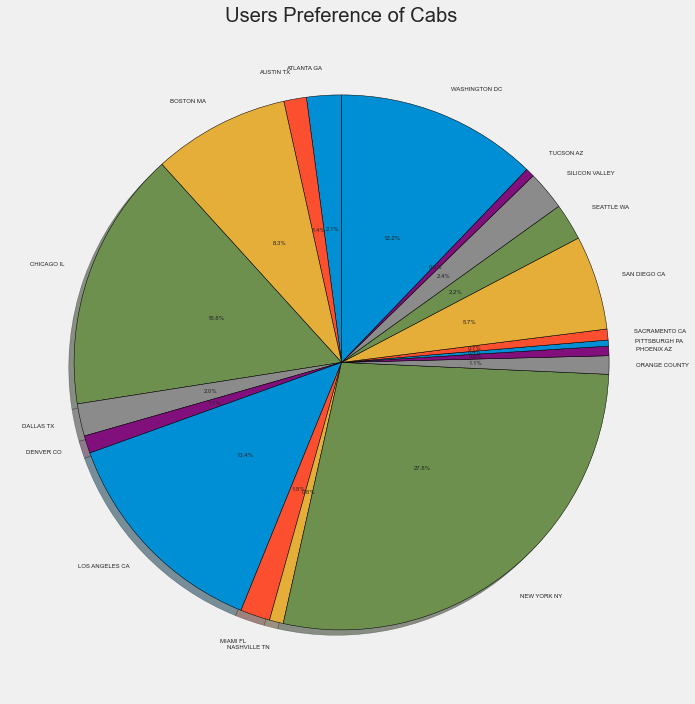

In [37]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(18,10))

slices = final_df.groupby('City')['Users'].count().values
labels = final_df.groupby('City')['Users'].count().index

plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},
        autopct='%0.1f%%',shadow=True,pctdistance=0.5,startangle=90,textprops={'fontsize': 6})

plt.title("Users Preference of Cabs")
plt.tight_layout()
plt.show()

## This graph shows that New York City has the highest Cab users with 27% followed by Chicago with 16% and Los Angeles with 13%.

# Profit Analysis

In [38]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [39]:
final_df['Profit Margin'] = final_df['Price Charged'] - final_df['Cost of Trip']

In [40]:
final_df['Profit Margin']

0          57.3150
1         281.2772
2         194.6480
3          23.6660
4         253.9808
            ...   
359387    143.6180
359388     23.0464
359389     -5.8540
359390     -6.0900
359391     25.7948
Name: Profit Margin, Length: 359392, dtype: float64

In [42]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit Margin
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808


<Figure size 1440x1296 with 0 Axes>

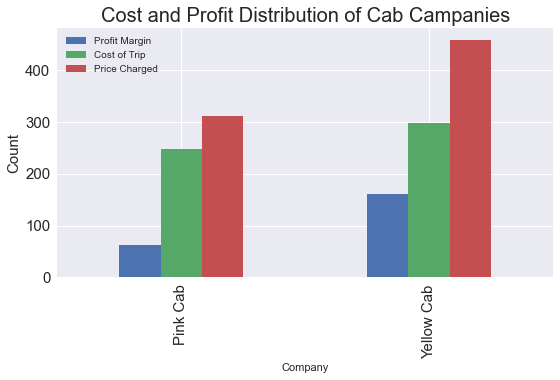

In [43]:
plt.style.use("seaborn")
plt.figure(figsize = (20, 18))
final_df.groupby('Company')[['Profit Margin','Cost of Trip','Price Charged']].mean().plot.bar()
plt.title('Cost and Profit Distribution of Cab Campanies', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

## This graph shows that Profit Margin of Yellow Cab is more than Pink Cab

In [44]:
final_df['Year'] = final_df['Date of Travel'].dt.year
final_df['Month'] = final_df['Date of Travel'].dt.month
final_df['Day'] = final_df['Date of Travel'].dt.day

In [45]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit Margin,Year,Month,Day
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,2,6
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,8,19
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,12,22
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,2,4
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,5,20


In [48]:
## Profit margin Of Each Cab Company Per year
final_df.groupby(['Year','Company']).sum()[['Profit Margin']]

Profit Margin
Year Company                  
2016 Pink Cab     1.388024e+06
     Yellow Cab   1.232684e+07
2017 Pink Cab     1.977169e+06
     Yellow Cab   1.633783e+07
2018 Pink Cab     1.680894e+06
     Yellow Cab   1.388173e+07
2019 Pink Cab     2.612415e+05
     Yellow Cab   1.473970e+06

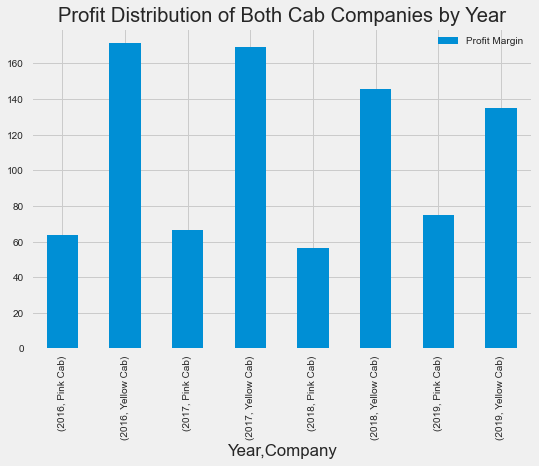

In [72]:
final_df.groupby(['Year','Company']).mean()[['Profit Margin']].plot.bar()
plt.title("Profit Distribution of Both Cab Companies by Year")
plt.show()

# This graph shows the profit margin of Each Cab company per year. We can see that the profit margin of Yellow cab is more
# than Pink Cab. However, Yellow Cab company profit was more in year 2016 and 2017 and it has a decreasing trend.
# Also, Note that Pink Cab company has an increasing profit growth trend.

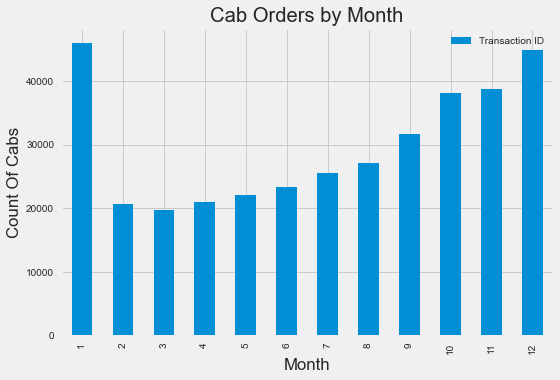

In [61]:
plt.style.use("fivethirtyeight")
final_df.groupby(['Month']).count()[['Transaction ID']].plot.bar()
plt.title("Cab Orders by Month")
plt.ylabel("Count Of Cabs")
plt.tight_layout()
plt.show()

## This graph shows that the Cab was ordered the most in the month of January and December

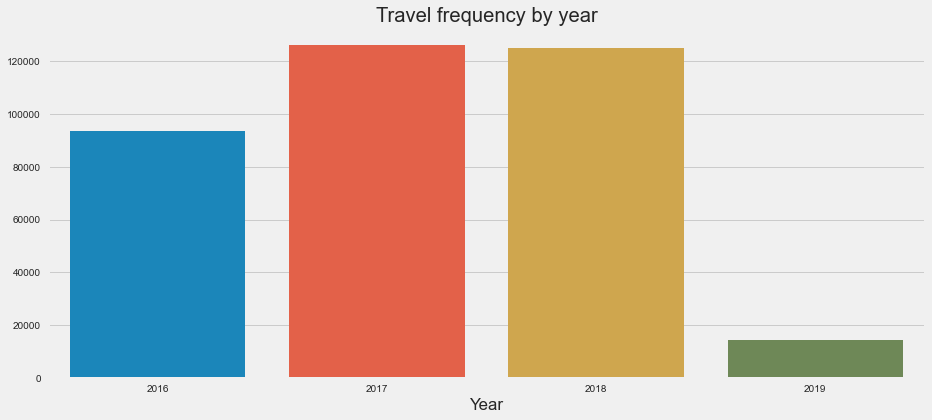

In [63]:
plt.figure(figsize=(14,6))
year_df=final_df.groupby(['Year'])['Transaction ID'].count()
sns.barplot(x=year_df.index,y=year_df.values)
plt.title('Travel frequency by year')
plt.show()

## This graph shows that the travel by cab was more in 2017 and 2018.

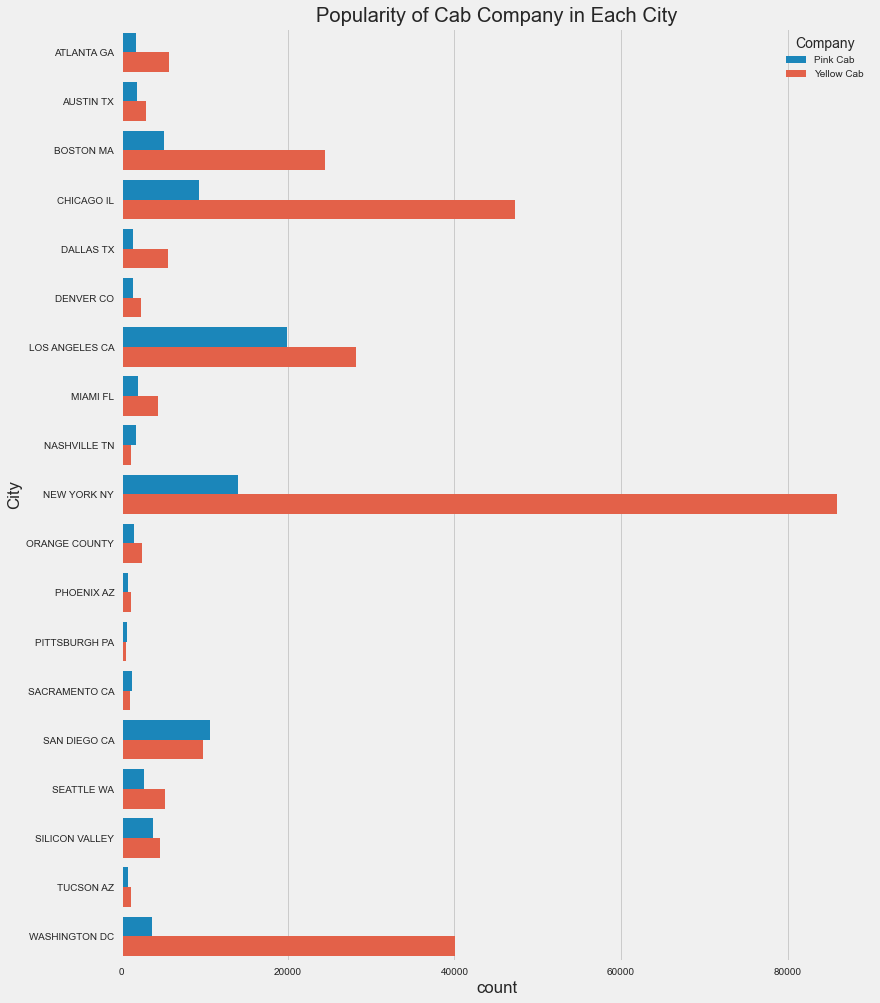

In [73]:
f, ax = plt.subplots(figsize=(12, 16))
ax = sns.countplot(y='City', hue='Company', data=final_df)
plt.title("Popularity of Cab Company in Each City")
plt.show()

## This Graph shows that Yellow Cab is more popular 15 countries including Washington DC, New York NY, Chicago IL, Boston MA.
## However, Pink Cab is more popular in San Diego CA, Sacramento CA and Nashville TN.

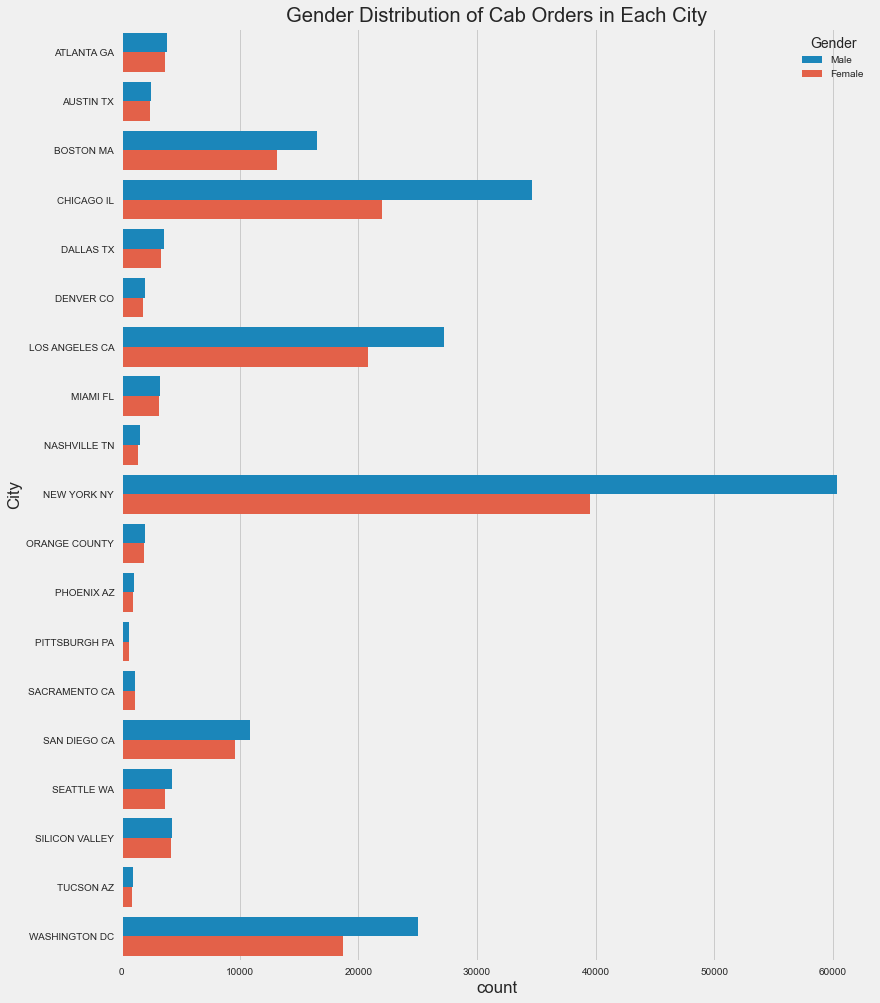

In [74]:
f, ax = plt.subplots(figsize=(12, 16))
ax = sns.countplot(y='City', hue='Gender', data=final_df)
plt.title("Gender Distribution of Cab Orders in Each City")
plt.show()

In [75]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit Margin,Year,Month,Day
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,2,6
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,8,19
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,12,22
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,2,4
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,5,20


In [80]:
final_df['Day_name'] = final_df['Date of Travel'].dt.day_name()

In [123]:
final_df['Day_is_weekend'] = np.where(final_df['Day_name'].isin(['Sunday', 'Saturday']),1,0)

In [124]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Population,Users,Profit Margin,Year,Month,Day,Day_name,Profit per Km,Age Group,Day_is_weekend
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,814885,24701,57.3150,2016,2,6,Saturday,1.882266,Young,1
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,814885,24701,281.2772,2018,8,19,Sunday,10.739870,Young,1
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,814885,24701,194.6480,2018,12,22,Saturday,4.574571,Young,1
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,814885,24701,23.6660,2016,2,4,Thursday,0.826904,Young,0
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,814885,24701,253.9808,2018,5,20,Sunday,6.981330,Young,1


In [82]:
final_df.groupby('Day_name').sum()['Profit Margin']

Day_name
Friday       4.590507e+06
Monday       1.103908e+07
Saturday     1.188300e+07
Sunday       1.127792e+07
Thursday     3.513502e+06
Tuesday      3.504933e+06
Wednesday    3.518765e+06
Name: Profit Margin, dtype: float64

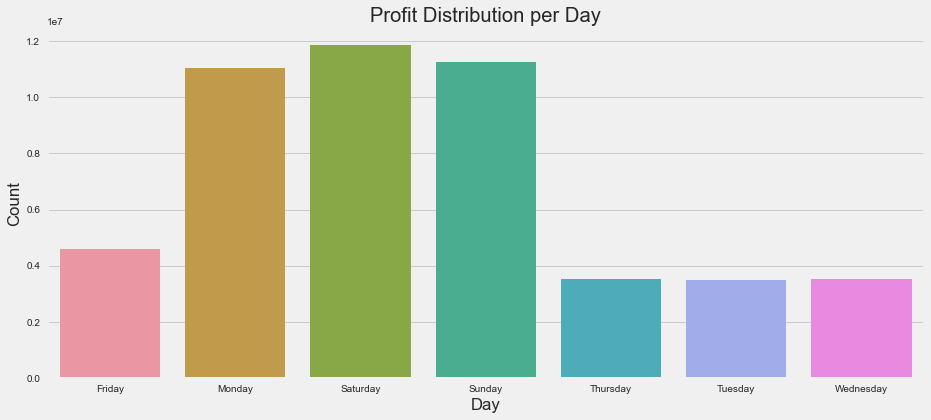

In [87]:
plt.figure(figsize=(14,6))
profit_by_dayname = final_df.groupby('Day_name').sum()['Profit Margin']
sns.barplot(x=profit_by_dayname.index,y=profit_by_dayname.values)
plt.title('Profit Distribution per Day')
plt.ylabel("Count")
plt.xlabel("Day")
plt.show()

## This graph shows that on Mondays, Saturdays and Sundays Cab Companies are making more profit.

In [90]:
## Profit Per Km
final_df["Profit per Km"] = final_df['Profit Margin']/final_df['KM Travelled']

In [92]:
final_df.groupby('Company')['Profit per Km'].mean()

Company
Pink Cab      2.769908
Yellow Cab    7.105508
Name: Profit per Km, dtype: float64

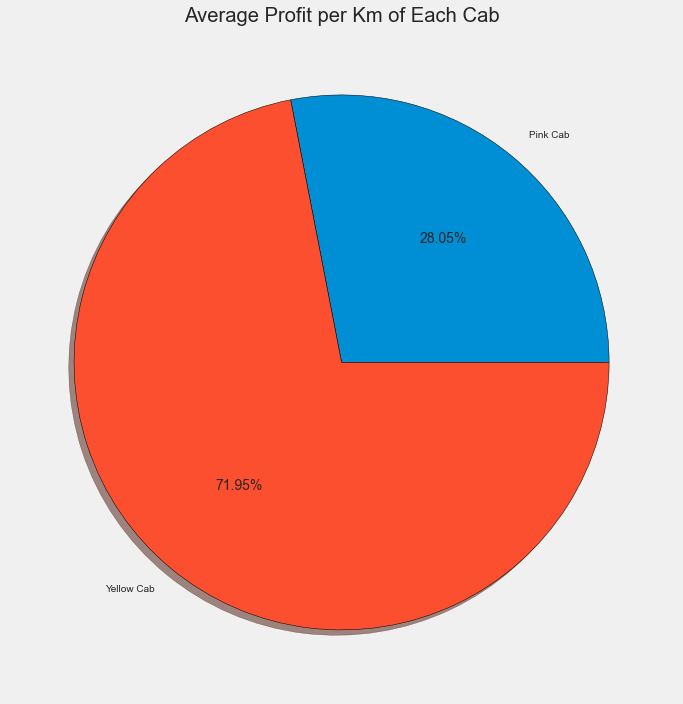

In [93]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,10))

slices = final_df.groupby('Company')['Profit per Km'].mean().values
labels = final_df.groupby('Company')['Profit per Km'].mean().index

plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},
        autopct='%1.2f%%',shadow=True)

plt.title("Average Profit per Km of Each Cab")
plt.tight_layout()
plt.show()

## Yellow Cab’s average profit per KM is almost three times the average profit per KM of the Pink cab.

In [95]:
final_df.Age.describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [97]:
def age_grouping(x):
    if x >= 18 and x <30:
        return "Young"
    elif x >=30 and x < 49:
        return "Mid-Aged"
    else:
        return "Old"

In [99]:
final_df["Age Group"] = final_df['Age'].apply(lambda x: age_grouping(x))

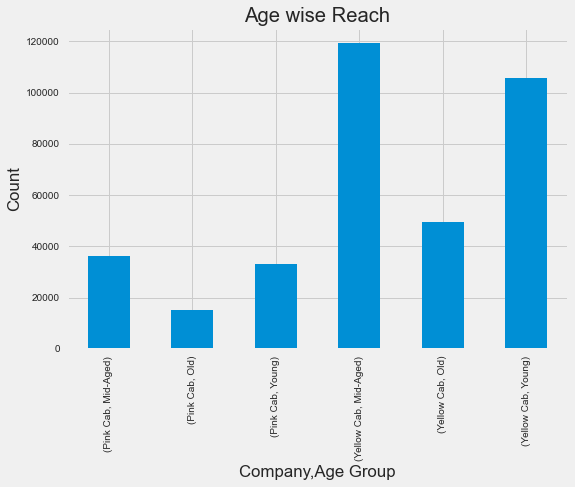

In [106]:
final_df.groupby(['Company','Age Group'])['Age Group'].count().plot.bar()
plt.ylabel("Count")
plt.title("Age wise Reach")
plt.show()
## Yellow cab has customer in all age group and it’s been observed that it’s even popular in 50+ age group as equally as 
## 18-29 age group

# The Results of the Above EDA are :
1. Most Users prefer to use Yellow Cab Than Pink Cab
2. Most users prefer to pay by Card than Cash.
3. Most of the users travel in between 5 to 40 km.
4. Most of the users where in between age 20 to 40.
5. Price charged by Yellow cab is comparitively more than Pink Cab.
6. Male users prefer to travel by cab more.
7. New York City Has Most Number of Cab Users.
8. New York City has the highest Cab users with 27% followed by Chicago with 16% and Los Angeles with 13%.
9. Cab was ordered the most in the month of January and December.
10.Travel by cab was more in 2017 and 2018.
11.Yellow Cab is more popular 15 countries including Washington DC, New York NY, Chicago IL, Boston MA.
   However, Pink Cab is more popular in San Diego CA, Sacramento CA and Nashville TN.
12.Yellow cab has customer in all age group and it’s been observed that it’s even popular in 50+ age group as equally as 
   18-29 age group

# Profit Analysis
1. Profit Margin of Yellow Cab is more than Pink Cab.
2. However, Yellow Cab company profit was more in year 2016 and 2017 and it has a decreasing trend.
   Also, Note that Pink Cab company has an increasing profit growth trend.
3. Mondays, Saturdays and Sundays Cab Companies are making more profit.

# Result
XYZ company should invest in Yellow Cab

# Hypothesis Testing

In [107]:
from scipy.stats import ttest_ind

Hypothesis 1: Is there any difference in Profit with mode of Payment
Defining Null Hypothesis
H0 : There is no significant difference regarding mode of payment in both cab companies.
defining Alternate Hypothesis
H1 : There is significant difference regarding mode of payment in both cab companies

In [119]:
## Pink Cab
d1 = final_df[(final_df.Payment_Mode =='Cash')&(final_df.Company=='Pink Cab')].groupby('Transaction ID')['Profit Margin'].mean()
d2 = final_df[(final_df.Payment_Mode =='Card')&(final_df.Company=='Pink Cab')].groupby('Transaction ID')['Profit Margin'].mean()

_, p_value = ttest_ind(d1.values,
                       d2.values,
                       equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print("We reject null hypothesis or accept alternative hypothesis (H1) that there is a difference regarding mode of payment for Pink Cab")
else:
    print('We accept null hypothesis (H0) that there is no difference regarding mode of payment for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference regarding mode of payment for Pink Cab


In [120]:
## Yellow Cab
d1 = final_df[(final_df.Payment_Mode =='Cash')&(final_df.Company=='Yellow Cab')].groupby('Transaction ID')['Profit Margin'].mean()
d2 = final_df[(final_df.Payment_Mode =='Card')&(final_df.Company=='Yellow Cab')].groupby('Transaction ID')['Profit Margin'].mean()

_, p_value = ttest_ind(d1.values,
                       d2.values,
                       equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print("We reject null hypothesis or accept alternative hypothesis (H1) that there is a difference regarding mode of payment for Pink Cab")
else:
    print('We accept null hypothesis (H0) that there is no difference regarding mode of payment for Pink Cab')

P value is  0.2933060638298729
We accept null hypothesis (H0) that there is no difference regarding mode of payment for Pink Cab


### We can now say that, There is no difference in profit with mode of payment

In [126]:
## Pink Cab
d1 = final_df[(final_df.Day_is_weekend == 1)&(final_df.Company=='Pink Cab')].groupby('Transaction ID')['Profit Margin'].mean()
d2 = final_df[(final_df.Day_is_weekend == 0)&(final_df.Company=='Pink Cab')].groupby('Transaction ID')['Profit Margin'].mean()

_, p_value = ttest_ind(d1.values,
                       d2.values,
                       equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print("We reject null hypothesis or accept alternative hypothesis (H1) that there is a difference regarding weekend on Profit for Pink Cab")
else:
    print('We accept null hypothesis (H0) that there is no difference regarding weekend on Profit for Pink Cab')

P value is  3.6685059417138927e-85
We reject null hypothesis or accept alternative hypothesis (H1) that there is a difference regarding weekend on Profit for Pink Cab


In [127]:
## Pink Cab
d1 = final_df[(final_df.Day_is_weekend == 1)&(final_df.Company=='Yellow Cab')].groupby('Transaction ID')['Profit Margin'].mean()
d2 = final_df[(final_df.Day_is_weekend == 0)&(final_df.Company=='Yellow Cab')].groupby('Transaction ID')['Profit Margin'].mean()

_, p_value = ttest_ind(d1.values,
                       d2.values,
                       equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print("We reject null hypothesis or accept alternative hypothesis (H1) that there is a difference regarding weekend on Profit for Pink Cab")
else:
    print('We accept null hypothesis (H0) that there is no difference regarding weekend on Profit for Pink Cab')

P value is  6.841211801770341e-115
We reject null hypothesis or accept alternative hypothesis (H1) that there is a difference regarding weekend on Profit for Pink Cab


### We can now say that, There is significant difference in profit with Weekend